# Lecture 5 - Introduction to the Newsvendor Problem

In this Jupyter Notebook, we will obtain some basic insights about the behavior of the newsvendor problem using simulated data. 

To begin with, let us suppose that we are selling a product for a unit price of \\$100, and that it costs us \\$90 per unit to stock the product. We sell the product each day to our customers, and at the end of the day, any unsold inventory must be discarded.

We are going to assume that our demand follows a (rounded) normal distribution with mean 500, and standard deviation 100. 

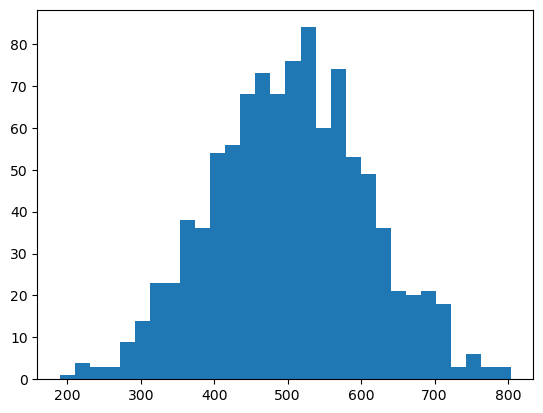

In [23]:
import numpy as np

# Set our random seed:
np.random.seed(101)

# Generate the (empirical) demand distribution
D_mean = 500
D_SD = 100
sample_size = 1000
demand_data = np.random.normal(D_mean, D_SD, sample_size)
demand_data = demand_data.round()

# Just for fun, let's also plot the demand distribution:
import matplotlib.pyplot as plt
plt.hist(demand_data, bins=30)
plt.show()


Next, we are going to create a function that will calculate for us the profit for a given realization of demand (this is `single_profit_fn`) and then use that to calculate the expected profit for each possible value of $Q$. 

In [24]:
p = 100
c = 90
Q_range = range(1000)

def single_profit_fn(D):
    return p * min(D,Q) - c*Q

expected_profit = np.zeros(1000)
for Q in Q_range:
    temp = np.array( list(map( single_profit_fn, demand_data)) )
    expected_profit[Q] = temp.mean()


In [25]:
expected_profit[0:5]

array([ 0., 10., 20., 30., 40.])

Let's plot the expected profit as a function of $Q$:

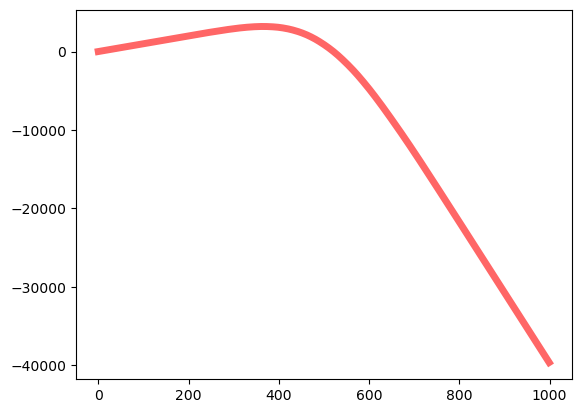

In [26]:
plt.plot(Q_range, expected_profit, 'r-', lw=5, alpha=0.6, label='Expected Profit')

Let's also find the optimal order quantity:

In [27]:
optimal_Q = expected_profit.argmax()
optimal_Q

363

## Understanding the optimal order quantity

Our optimal order quantity is 363. Where did this number come from? 

To understand this, let's ask the following question. What is the probability that the demand is _above_ our optimal order quantity? In other words, what is the probability that we are not able to satisfy demand?

In [28]:
# Calculate the probability of lost sales 
probability_of_lost_sales = sum( [demand_data[i] > optimal_Q for i in range(1000)] ) / demand_data.size
probability_of_lost_sales
# [demand_data[i] > optimal_Q for i in range(1000)]

0.898

In [29]:
import scipy.stats as stats

ndist = stats.norm(loc = D_mean, scale = D_SD)

print(optimal_Q, D_mean, D_SD)

exact_probability_of_lost_sales = 1 - ndist.cdf( optimal_Q  )
exact_probability_of_lost_sales

363 500 100


0.914656549178033

Based on our historical demand, it appears that the probability of not satisfying demand is 0.898, or roughly 0.9. Recall that our unit price $p$ was \\$100 and our unit cost $c$ was \\$90. 

To further understand this, let's see what happens when we change the cost $c$. Suppose we change it to \\$70:

In [30]:
p = 100
c = 70

expected_profit = np.zeros(1000)
for Q in Q_range:
    temp = np.array( list(map( single_profit_fn, demand_data)) )
    expected_profit[Q] = temp.mean()

optimal_Q = expected_profit.argmax()
optimal_Q

probability_of_lost_sales = sum( [demand_data[i] > optimal_Q for i in range(1000)] ) / demand_data.size
probability_of_lost_sales

print("Optimal Q: ", optimal_Q)
print("Probability of lost sales: ", probability_of_lost_sales)

Optimal Q:  446
Probability of lost sales:  0.698


The probability of not satisfying demand (i.e., of demand \$D\$ being above our order quantity \$Q\$) is 0.698 (\$\approx\$ 0.7).

Let's try another example: let's set \$c\$ to 10. 

In [32]:
p = 100
c = 10
print("The value we expect (c/p): ", c/p)

expected_profit = np.zeros(1000)
for Q in Q_range:
    temp = np.array( list(map( single_profit_fn, demand_data)) )
    expected_profit[Q] = temp.mean()

optimal_Q = expected_profit.argmax()
optimal_Q

probability_of_lost_sales = sum( [demand_data[i] > optimal_Q for i in range(1000)] ) / demand_data.size
probability_of_lost_sales

print("Optimal Q: ", optimal_Q)
print("Probability of lost sales: ", probability_of_lost_sales)

The value we expect (c/p):  0.1
Optimal Q:  635
Probability of lost sales:  0.097


The optimal \$Q\$ is 635, and the probability of lost sales is 0.097 (\$\approx\$ 0.10). Do you see the pattern yet?

## The newsvendor quantile

It turns out that if $F$ is the cumulative distribution function of $D$, that is, for every $d \in \mathbb{R}$,

$$ P(D \leq d) = F(d) $$

then the optimal solution of the newsvendor problem 

$$ \max_Q p \cdot \mathbb{E}[ \min\{Q, D\}] - cQ $$

is given by 

$$ Q^* = F^{-1} \left( \frac{p - c}{p} \right),$$

In other words, the optimal order quantity is the $(p - c)/p$ quantile of the demand distribution. 

Let's see this again with our example from before: suppose that $p$ is \\$240, and $c$ is \\$110:

In [33]:
p = 240
c = 110
nv_quantile = (p - c)/p 
print("Optimal newsvendor quantile: ", nv_quantile)

optimal_Q_nv = np.quantile(demand_data, nv_quantile)
print("Optimal newsvendor order quantity: ", optimal_Q_nv)

expected_profit = np.zeros(1000)
for Q in Q_range:
    temp = np.array( list(map( single_profit_fn, demand_data)) )
    expected_profit[Q] = temp.mean()

optimal_Q = expected_profit.argmax()
optimal_Q

probability_of_lost_sales = sum( [demand_data[i] > optimal_Q for i in range(1000)] ) / demand_data.size
probability_of_lost_sales

print("Optimal Q: ", optimal_Q)
print("Probability of lost sales: ", probability_of_lost_sales)
print()
print("Optimal Q (using NV formula): ", optimal_Q_nv)
print("NV quantile: ", nv_quantile)

Optimal newsvendor quantile:  0.5416666666666666
Optimal newsvendor order quantity:  516.0
Optimal Q:  516
Probability of lost sales:  0.456

Optimal Q (using NV formula):  516.0
NV quantile:  0.5416666666666666


Pretty cool, eh?

Note that this does not only hold for the normal distribution; it holds for _any_ demand distribution. For example, suppose that our data came from a Gamma distribution:

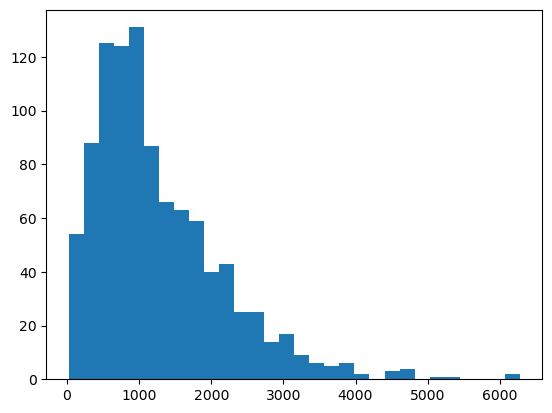

In [34]:
sample_size = 1000
D_shape = 2
D_scale = 600
demand_data = np.random.gamma(D_shape, D_scale, sample_size)
demand_data = demand_data.round()

import matplotlib.pyplot as plt
plt.hist(demand_data, bins=30)
plt.show()

In [35]:
# Calculate the order quantity when data follows a gamma distribution:

p = 240
c = 110
nv_quantile = (p - c)/p 

optimal_Q_nv = np.quantile(demand_data, nv_quantile)

expected_profit = np.zeros( int(demand_data.max()))
Q_range = range( int(demand_data.max())) 
for Q in Q_range:
    temp = np.array( list(map( single_profit_fn, demand_data)) )
    expected_profit[Q] = temp.mean()

optimal_Q = expected_profit.argmax()
optimal_Q

probability_of_lost_sales = sum( [demand_data[i] > optimal_Q for i in range(demand_data.size)] ) / demand_data.size
probability_of_lost_sales

print("Optimal Q: ", optimal_Q)
print("Probability of lost sales: ", probability_of_lost_sales)
print()
print("Optimal Q (using NV formula): ", optimal_Q_nv)
print("NV quantile: ", nv_quantile)

Optimal Q:  1117
Probability of lost sales:  0.458

Optimal Q (using NV formula):  1117.125
NV quantile:  0.5416666666666666
